In [1]:
import numpy as np
from random import randint
import timeit
from timeit import default_timer
import matplotlib.pyplot as plt


In [2]:
def simple_multiply(matrix1, matrix2):
    l=len(matrix2)
    n=len(matrix1)
    m=len(matrix2[0])
    res = [[0]*m]*n
    for i in range(n):
        for j in range(m):
            for k in range(l):
                res[i][j] += matrix1[i][k] * matrix2[k][j]
    return res

In [3]:
def divide(matrix):
    dividor = len(matrix)//2
    return matrix[:dividor, :dividor],matrix[:dividor, dividor:],matrix[dividor:, :dividor],matrix[dividor:, dividor:]


def strassen_multiply(matrix1, matrix2):
    if len(matrix1)<=2:
        return simple_multiply(matrix1, matrix2)
    a, b, c, d = divide(matrix1)
    a1, b1, c1, d1 = divide(matrix2)
    matrix1 = strassen_multiply(a+d, a1+d1)
    matrix2 = strassen_multiply(d, c1-a1)
    matrix3 = strassen_multiply(a+b, d1)
    matrix4 = strassen_multiply(b-d, c1+d1)
    matrix5 = strassen_multiply(a, b1-d1)
    matrix6 = strassen_multiply(c+d, a1)
    matrix7 = strassen_multiply(a-c, a1+b1)
    c11 = matrix1 + matrix2 - matrix3 + matrix4
    c12 = matrix5 + matrix3
    c21 = matrix6 + matrix2
    c22 = matrix5 + matrix1 - matrix6 - matrix7
    return (np.hstack((c11, c12)), np.hstack((c21, c22)))


In [4]:
cardinalities = [5, 100, 200, 300, 500, 1000, 1500]
matrixes = []
for card in cardinalities:
    for _ in range(card):
        matrix = []
        matrix.append([randint(0, 10) for _ in range(card)])
    matrixes.append(matrix)

In [5]:
standart_times=[]
str_times=[]

for matrix in matrixes:
    standart_times.append(timeit.timeit(lambda: simple_multiply(matrix, matrix), number=50, timer=default_timer)/50)
    str_times.append(timeit.timeit(lambda: strassen_multiply(matrix, matrix), number=50, timer=default_timer)/50)

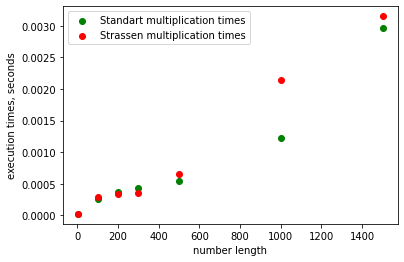

In [6]:
plt.scatter(cardinalities, standart_times, color='green', label="Standart multiplication times")
plt.scatter(cardinalities, str_times, color='red', label="Strassen multiplication times")
plt.xlabel("number length")
plt.ylabel("execution times, seconds")
leg=plt.legend()

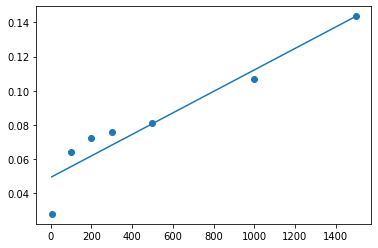

In [7]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(cardinalities, [pow(i, 1/3) for i in standart_times])

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, cardinalities))

plt.scatter(cardinalities, [pow(i, 1/3) for i in standart_times])
plt.plot(cardinalities, mymodel)

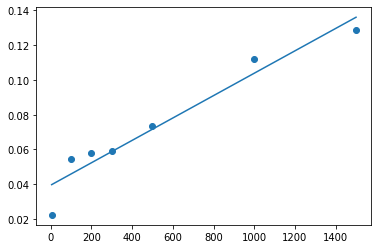

In [8]:
from scipy import stats
from math import log

slope, intercept, r, p, std_err = stats.linregress(cardinalities, [pow(i, 1/log(7,2)) for i in str_times])

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, cardinalities))

plt.scatter(cardinalities, [pow(i, 1/log(7,2)) for i in str_times])
plt.plot(cardinalities, mymodel)

<AxesSubplot:ylabel='Count'>

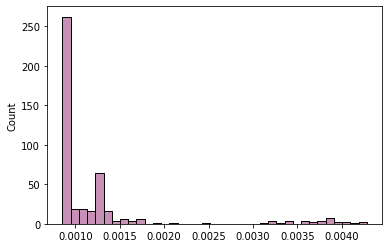

In [9]:
import seaborn as sns

rand_matrix=[]
for _ in range(10):
    rand_matrix.append([randint(0, 10) for _ in range(10)])

matrix1=[]
for _ in range(10):
    matrix1.append([1]*10)

matrix9=[]
for _ in range(10):
    matrix9.append([9]*10)

times = [[]]*3
for _ in range(150):
    t1 = default_timer()
    simple_multiply(matrix1, matrix1)
    times[0].append(default_timer()-t1)

for _ in range(150):
    t1 = default_timer()
    simple_multiply(rand_matrix, rand_matrix)
    times[1].append(default_timer()-t1)

for _ in range(150):
    t1 = default_timer()
    simple_multiply(matrix9, matrix9)
    times[2].append(default_timer()-t1)

sns.histplot(times[0], color="blue", alpha=0.3)
sns.histplot(times[1], color="red", alpha=0.2)
sns.histplot(times[2], color="orange", alpha=0.1)

In [10]:
import seaborn as sns

rand_matrix=[]
for _ in range(10):
    rand_matrix.append([randint(0, 10) for _ in range(10)])

matrix1=[]
for _ in range(10):
    matrix1.append([1]*10)

matrix9=[]
for _ in range(10):
    matrix9.append([9]*10)

times = [[]]*3
for _ in range(150):
    t1 = default_timer()
    strassen_multiply(matrix1, matrix1)
    times[0].append(default_timer()-t1)

for _ in range(150):
    t1 = default_timer()
    strassen_multiply(rand_matrix, rand_matrix)
    times[1].append(default_timer()-t1)

for _ in range(150):
    t1 = default_timer()
    strassen_multiply(matrix9, matrix9)
    times[2].append(default_timer()-t1)

sns.histplot(times[0], color="blue", alpha=0.3)
sns.histplot(times[1], color="red", alpha=0.2)
sns.histplot(times[2], color="orange", alpha=0.1)

TypeError: list indices must be integers or slices, not tuple